# Important

Run `fetch_cases.py` in `Transmission` to get `cases.json`.

In [1]:
import os
import json

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
transmissonDir = "Transmission"

with open(os.path.join(transmissonDir, "cases.json"), 'r') as f:
    cases = json.load(f)

In [3]:
pinyin = {
    "安徽省": "Anhui", "河南省": "Henan", "广东省": "Guangdong",
    "河北省": "Hebei", "湖北省": "Hubei", "江西省": "Jiangxi",
    "山东省": "Shandong", "山西省": "Shanxi", "天津市": "Tianjin",
    "西藏": "Xizang", "澳门": "Macau", "广西": "Guangxi",
    "湖南省": "Hunan", "上海市": "Shanghai", "四川省": "Sichuan",
    "香港": "Hong Kong", "云南省": "Yunnan", "北京市": "Beijing",
    "贵州省": "Guizhou", "河南省": "Henan", "江苏省": "Jiangsu",
    "辽宁省": "Liaoning", "青海省": "Qinghai", "陕西省": "Shaanxi",
    "台湾省": "Taiwan", "新疆": "Xinjiang", "浙江省": "Zhejiang",
    "海南省": "Hainan", "重庆市": "Chongqing", "内蒙古": "Inner Mongolia",
    "福建省": "Fujian", "黑龙江省": "Heilongjiang", "吉林省": "Jilin",
    "宁夏": "Ningxia", "甘肃省": "Gansu", "台湾": "Taiwan",
    "内蒙古自治区": "Inner Mongolia", "西藏自治区": "Xizang",
    "广西壮族自治区": "Guangxi", "宁夏回族自治区": "Ningxia",
    "广西省": "Guangxi"
}

In [4]:
area = list(set(pinyin.values()))
area.sort()

In [5]:
df = pd.DataFrame(columns=("Date", "Area", "Confirmed", "Critical", "Severe", "Cured", "Dead"))

for i in cases["province"]:
    for p in i["ProvinceDetail"]:
        row = {
            "Date": i["Time"], "Area": pinyin[p["Province"]],
            "Confirmed": p["Confirmed"], "Critical": p["Critical"],
            "Severe": p["Severe"], "Cured": p["Cured"],
            "Dead": p["Dead"]
        }
        df = df.append(pd.Series(data=row), ignore_index=True)

df["Date"] = pd.to_datetime(df["Date"])
df = df.drop_duplicates()

In [6]:
dateVSarea = df.pivot(index="Area", columns="Date", values="Confirmed")
# dateVSarea = dateVSarea.fillna(0).iloc[:, 0:len(dateVSarea.columns) - 1]
dateVSarea = dateVSarea.fillna(0).iloc[:, 0:13]

info = pd.read_csv(os.path.join("Data", "info.csv"))
dateVSarea = dateVSarea[dateVSarea.index.isin(info["Area"].drop_duplicates())]
dateVSarea = dateVSarea.sort_values(by="2020-01-23")

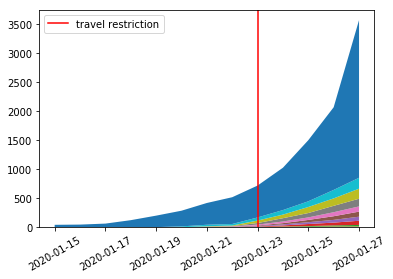

In [8]:
yVal = []
for index, row in dateVSarea.iterrows():
#     plt.plot([], [], label=index)
    yVal.append(row)
plt.stackplot(dateVSarea.columns, *yVal)
plt.axvline(x = "2020-01-23", color = "red", label = "travel restriction")
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.savefig(fname = os.path.join(transmissonDir, "cases.png"))
plt.show()